In [1]:
import matplotlib.pyplot as plt
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [3]:
import pandas as pd 
df = pd.read_csv('IndexData.csv')
df
df['Index'].unique()

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

In [2]:
import pandas as pd 
df = pd.read_csv('IndexData.csv')
new = pd.DataFrame.from_dict(df)
df1 = df.iloc[58057:61436,] ## Filtering by rows NYA
df2 = df1.filter(items=['Close'])
df2= np.array(df2)
np.reshape(3379,1)
df2.shape

(3379, 1)

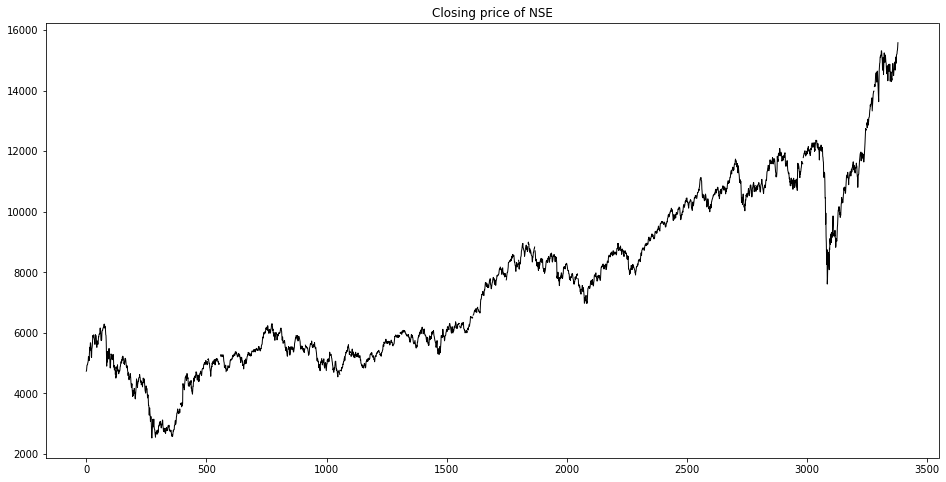

In [3]:
plt.figure(figsize=(16,8))
plt.plot(df2, color = 'Black', linewidth = 1)
plt.title('Closing price of NSE')
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))
df2

array([[0.16909548],
       [0.17025944],
       [0.17715145],
       ...,
       [0.98124223],
       [0.98873161],
       [1.        ]])

In [5]:
train_size = int(len(df2)*0.8)
test_size = len(df2) - train_size
train_data, test_data = df2[0:train_size,:], df2[test_size:len(df2),:1]


In [6]:
train_size, test_size

(2703, 676)

In [7]:
import numpy
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)
        

In [8]:
time_step =100 
x_train, y_train = create_dataset(train_data, time_step)
x_test, ytest = create_dataset(test_data, time_step)

In [9]:
print(x_train.shape), print(y_train.shape)

(2602, 100)
(2602,)


(None, None)

In [15]:
# reshape input to be [samples, time steps, features] which is required for LSTM
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)
print(x_train)   

[[[0.16909548]
  [0.17025944]
  [0.17715145]
  ...
  [0.19979554]
  [0.1988077 ]
  [0.1786409 ]]

 [[0.17025944]
  [0.17715145]
  [0.18439957]
  ...
  [0.1988077 ]
  [0.1786409 ]
  [0.17720507]]

 [[0.17715145]
  [0.18439957]
  [0.18490881]
  ...
  [0.1786409 ]
  [0.17720507]
  [0.18418898]]

 ...

 [[0.58870016]
  [0.59124256]
  [0.58231361]
  ...
  [0.68510791]
  [0.69131072]
  [0.69277721]]

 [[0.59124256]
  [0.58231361]
  [0.59738031]
  ...
  [0.69131072]
  [0.69277721]
  [0.69368463]]

 [[0.58231361]
  [0.59738031]
  [0.59787418]
  ...
  [0.69277721]
  [0.69368463]
  [0.69172038]]]


In [18]:
model = Sequential()
from keras.layers import SimpleRNN
model.add(SimpleRNN(1, return_sequences = True,input_shape = (x_train.shape[1], 1)))
model.add(SimpleRNN(1, return_sequences = True, ))
model.add(SimpleRNN(1, ))
#model.add(Dense(20))
model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.L1(0.01)))
sgd = tf.keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True,clipnorm=100)
model.compile(loss = 'mse', optimizer = 'sgd')
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
11/82 [===>..........................] - ETA: 1:41 - loss: nan

KeyboardInterrupt: 

In [12]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [13]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [14]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').